In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# make cluster using k-means


In [92]:
# make cluster using k-means
X,y_true=make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42)
X

array([[-6.1900632 , -7.30201545],
       [ 3.02174685,  1.94059276],
       [ 5.9537606 ,  1.48819071],
       [-2.74446251,  8.13617716],
       [ 5.36060719,  1.72832446],
       [ 5.13808033,  1.45951939],
       [-5.34357647, -6.93774553],
       [ 4.80215293,  1.94302682],
       [ 3.99930658,  1.88774199],
       [-7.25451834, -6.86445496],
       [ 4.25193511,  1.32424088],
       [-1.81404028,  8.52187674],
       [-1.2293776 ,  7.84303345],
       [-2.16666332,  9.69562551],
       [ 4.81374375,  3.21841016],
       [ 5.27493353,  0.91792599],
       [-2.5524037 ,  9.61640587],
       [-7.5532604 , -6.65066375],
       [-6.8302568 , -6.24082137],
       [-3.17299861,  8.29656215],
       [ 3.80073829,  2.31095123],
       [-2.38387947,  7.83848405],
       [ 4.98581301,  2.15991978],
       [-5.94031277, -6.91955975],
       [-7.14748736, -6.7636556 ],
       [ 4.87655012,  1.720579  ],
       [ 4.48689251,  2.87556548],
       [-6.4081471 , -6.62483506],
       [-6.71939703,

In [93]:
# convert the X into dataframe for feature 1 and feature 2 
df=pd.DataFrame(X,columns=["Feature 1","Feature 2"])
df

,Feature 1,Feature 2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [94]:
# make distance using standardScaler
Scaler=StandardScaler()
X_scaler=Scaler.fit_transform(X)

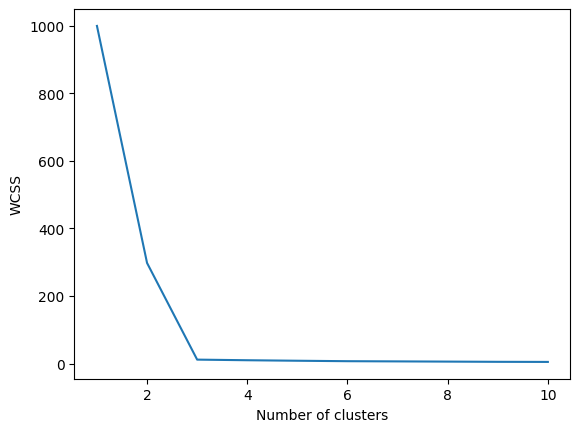

In [95]:
# we use elbow method to find the optimal number of clusters
# wcss

inertia=[]
k_range=range(1,11)
for k in k_range:
    kmean=KMeans(n_clusters=k,random_state=42)
    kmean.fit(X_scaler)
    inertia.append(kmean.inertia_)
inertia
plt.plot(k_range,inertia)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

best k-mean lies between 2-4

In [96]:
kmean_Final=KMeans(n_clusters=3,random_state=42)


In [97]:
cluster_labels=kmean_Final.fit_predict(X_scaler)
cluster_labels

array([1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0,

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

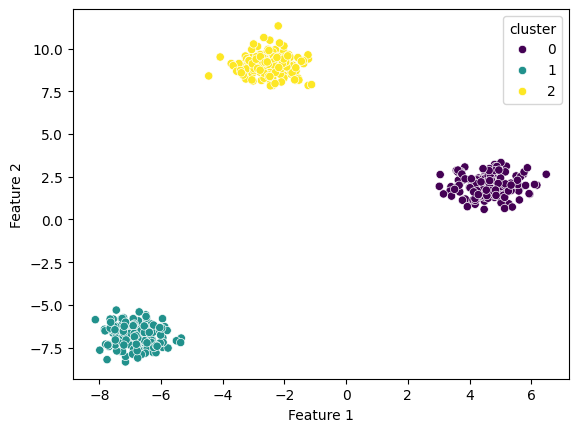

In [98]:
# Add cluster labels to dataframe
df['cluster'] = cluster_labels

# Scatter plot
sns.scatterplot(
    x=df['Feature 1'],
    y=df['Feature 2'],
    hue=df['cluster'],
    palette='viridis'
)


In [99]:
# import library
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [100]:
X,y_true=make_moons(n_samples=500,noise=0.05,random_state=42)

In [101]:
df=pd.DataFrame(X,columns=["Feature1","Feature2"])


In [102]:
Scaler=StandardScaler()
X_scaler=Scaler.fit_transform(df)

In [103]:
kmean=KMeans(n_clusters=2,random_state=42)
KMeans_lable=kmean.fit_predict(X_scaler)

<Axes: xlabel='Feature1', ylabel='Feature2'>

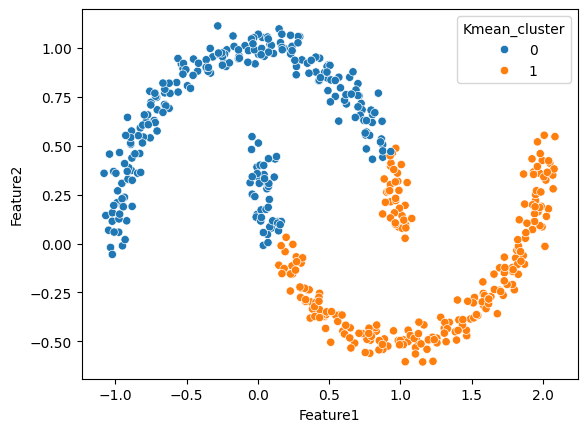

In [104]:
df['Kmean_cluster'] = KMeans_lable

# Scatter plot
sns.scatterplot(
    x=df['Feature1'],
    y=df['Feature2'],
    hue=df['Kmean_cluster'],
    palette='tab10'
)